In [1]:
import numpy as np
import matplotlib.pyplot as plt
from encoding.bin_encoder import BinEncoder

In [2]:
# The BinEncoder uses gaussian receptive fields to encode a value into multiple spike trains
# Each bin represents a different "center" value, and the firing rate for each bin
# depends on how close the input value is to that bin's center

encoder = BinEncoder(
    seq_length=200,    # Length of the spike train (more timesteps = better visualization)
    min_values=[0],    # Minimum value in our input range
    max_values=[1],    # Maximum value in our input range
    n_bins=10,         # Number of bins (more bins = finer resolution but more outputs)
    spike_train_conversion_method="poisson",  # Use poisson encoding for more biological plausibility
    sigma=0.1          # Controls the width of the gaussian curves (smaller = narrower peaks)
)

In [3]:
# We'll encode a single value (0.7) which should activate bins near 0.7 more strongly
test_value = 0.7
spike_trains = encoder.encode(np.array([test_value]))

# Reshape the spike trains for plotting
# The encoder outputs shape (n_bins, batch_size, seq_length)
# We want shape (n_bins, seq_length)
spike_trains = np.array(spike_trains).T
print(spike_trains[6])

[[1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1
  0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0
  1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1
  0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1
  0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
  0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0]]


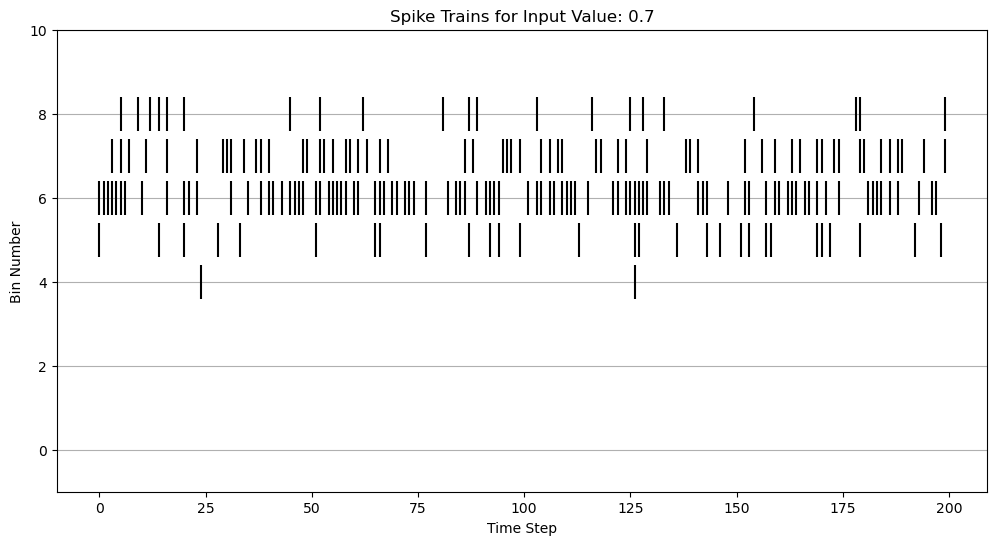

In [4]:
plt.figure(figsize=(12, 6))

# For each bin, plot vertical lines at spike times
for bin_idx in range(10):
    spike_train = spike_trains[bin_idx][0]
    spike_times = np.where(spike_train == 1)
    plt.vlines(spike_times, bin_idx - 0.4, bin_idx + 0.4, colors='black')

plt.title(f'Spike Trains for Input Value: {test_value}')
plt.xlabel('Time Step')
plt.ylabel('Bin Number')
plt.ylim(-1, 10)
plt.grid(True, axis='y')
plt.show()